#  Подготовка данных дебагов всех лет


    Вт июн 16 23:21:46 MSK 2020
    /home/alena/SPHERE/Analysis/Collect_datum

In [1]:
!date
!pwd

Ср июн 17 11:15:38 MSK 2020
/home/alena/SPHERE/Analysis/Collect_datum


In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
#чтобы датасеты с множеством колонок отображались полностью
pd.set_option('display.max_rows', 100, 'display.max_columns', 200)

In [3]:
year = 2010
dirname = '~/SPHERE/ExpData/Data.dbg/' + str(year) + '/'
!ls $dirname

2010_flight1.dbg  all_dbg_params_2010_flight1.awk  dbg_sec.dat	flight6
2010_flight2.dbg  all_dbg_params.awk		   flight1	read_all.sh
2010_flight3.dbg  all_dbg_params.dat		   flight2	read_each.sh
2010_flight4.dbg  datum_2010_min.csv		   flight3
2010_flight5.dbg  datum_2010_sec.csv		   flight4
2010_flight6.dbg  dbg_min.dat			   flight5


In [4]:
dirname = '~/SPHERE/ExpData/Data.dbg/' + str(year) + '/dbg_min.dat/'
datum1 = pd.read_csv(dirname + str(year) + '_flight1.dbg.dat', header = 0, index_col=False, sep='\t')
datum2 = pd.read_csv(dirname + str(year) + '_flight2.dbg.dat', header = 0, index_col=False, sep='\t')
datum3 = pd.read_csv(dirname + str(year) + '_flight3.dbg.dat', header = 0, index_col=False, sep='\t')
datum4 = pd.read_csv(dirname + str(year) + '_flight4.dbg.dat', header = 0, index_col=False, sep='\t')
if year != 2011:
    datum5 = pd.read_csv(dirname + str(year) + '_flight5.dbg.dat', header = 0, index_col=False, sep='\t')
if year == 2010:
    datum6 = pd.read_csv(dirname + str(year) + '_flight6.dbg.dat', header = 0, index_col=False, sep='\t')
    datum6['run'] = 6

datum1['run'] = 1
datum2['run'] = 2
datum3['run'] = 3
datum4['run'] = 4
if year != 2011:
    datum5['run'] = 5

len(datum1), len(datum2), len(datum3), len(datum4), len(datum5)#, len(datum6)

(231, 184, 139, 413, 292)

In [5]:
datum1.columns

Index(['year', 'month', 'day', 'time', 'N', 'E', 'H', 'H-455', 'Gqi', 'Gsn',
       'Ghdp', 'Ggs', 'compass', 'P0_code', 'T0_code', 'P_hpa0', 'T0,C',
       'P1_code', 'T1_code', 'P_hpa1', 'T1,C', 'U15,V', 'U5,V', 'Uac,V', 'I,A',
       'Tpow,C', 'Tmos,C', 'Bot,C', 'Top,C', 'Num', 'Clin1', 'Clin2', 'ClinTh',
       'run'],
      dtype='object')

In [6]:
if year == 2009 or year == 2012 or year == 2013:
    data_by_year = [datum1, datum2, datum3, datum4, datum5]
elif year == 2011: 
    data_by_year = [datum1, datum2, datum3, datum4]
elif year == 2010:
    data_by_year = [datum1, datum2, datum3, datum4, datum5, datum6]
else:
    print("ERROR!  Unknown year!!!!", year)
datum = pd.concat(data_by_year)

datum['compass'] *= 0.1 
# удалить ненужные столбцы
del datum['Num']

In [7]:
datum

,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,run
0,2010,3,7,123952,5148.0891,10424.4104,1416.1,961.1,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,19.8,NaN,NaN,NaN,1
1,2010,3,7,124506,5148.0893,10424.4058,1418.2,963.2,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN,1
2,2010,3,7,124607,5148.0878,10424.4010,1419.4,964.4,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,18.6,NaN,NaN,NaN,1
3,2010,3,7,124708,5148.0828,10424.4001,1419.5,964.5,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.6,NaN,NaN,NaN,1
4,2010,3,7,124809,5148.0810,10424.4045,1419.8,964.8,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.8,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2010,3,17,212531,5148.0980,10424.2508,838.3,383.3,1,9,0.9,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,5.16,18.80,2.45,35.00,-10.0,18,20.9,NaN,NaN,NaN,6
349,2010,3,17,212632,5148.0937,10424.2564,840.4,385.4,1,9,0.9,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,5.17,18.79,2.46,35.25,-10.0,18.1,21,NaN,NaN,NaN,6
350,2010,3,17,212733,5148.0931,10424.2480,839.0,384.0,1,9,0.9,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,5.16,18.77,2.76,35.00,-10.0,18,21.1,NaN,NaN,NaN,6
351,2010,3,17,212926,5148.0953,10424.2593,841.1,386.1,1,9,0.9,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.01,5.16,18.79,2.48,35.50,-10.0,18,20.9,NaN,NaN,NaN,6


In [8]:
datum.run.value_counts()

4    413
6    353
5    292
1    231
2    184
3    139
Name: run, dtype: int64

In [9]:
print(datum.shape)
datum = datum.drop_duplicates()
print(datum.shape)

(1612, 33)
(1610, 33)


In [10]:
datum.run.value_counts()

4    413
6    353
5    292
1    229
2    184
3    139
Name: run, dtype: int64

In [11]:
# посчитать высоту над поверхностью озера
H0 = datum.H.min()
print(H0)
#datum['H-455'] = datum.H - H0

818.7


In [12]:
datum.describe()

,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C",Clin1,Clin2,ClinTh,run
count,1610.0,1610.0,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1.610000e+03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,1381.000000,231.000000,231.000000,0.0,1610.000000
mean,2010.0,3.0,13.013043,167429.011801,5148.076734,10424.331075,1174.766460,719.766460,1.065217,9.233540,0.923354,-3.720000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.013751,5.161665,18.773802,2.648718,36.500362,-8.503802,0.472294,0.051515,NaN,3.878261
std,0.0,0.0,3.433894,23839.169022,0.056346,0.097766,222.000881,222.000881,0.246986,0.950022,0.097393,1.044822e-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004843,0.003746,0.032396,0.148517,2.517601,3.870168,1.523929,0.185765,NaN,1.693797
min,2010.0,3.0,7.000000,123952.000000,5147.875100,10424.148100,818.700000,363.700000,1.000000,7.000000,0.800000,-3.720000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.010000,5.150000,18.700000,2.440000,26.750000,-11.500000,0.000000,-0.300000,NaN,1.000000
25%,2010.0,3.0,9.000000,145726.250000,5148.018650,10424.240150,958.800000,503.800000,1.000000,9.000000,0.900000,-3.720000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.010000,5.160000,18.750000,2.480000,34.750000,-10.500000,0.000000,0.000000,NaN,2.000000
50%,2010.0,3.0,14.000000,163838.500000,5148.103500,10424.303950,1341.250000,886.250000,1.000000,9.000000,0.900000,-3.720000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.010000,5.160000,18.780000,2.750000,36.000000,-10.000000,0.000000,0.000000,NaN,4.000000
75%,2010.0,3.0,15.000000,185697.500000,5148.118800,10424.430900,1362.275000,907.275000,1.000000,10.000000,1.000000,-3.720000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.020000,5.160000,18.800000,2.770000,38.250000,-9.000000,0.000000,0.000000,NaN,5.000000
max,2010.0,3.0,17.000000,213030.000000,5148.158300,10424.485200,1419.800000,964.800000,2.000000,12.000000,1.300000,-3.720000e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.020000,5.170000,18.820000,2.860000,42.500000,1.750000,9.800000,1.200000,NaN,6.000000


## Пересчет изменения координат в метры

In [13]:
# пересчет из координат в метры
# координаты стартовой площадки 2013: 
# 51 47.8154 N 104 23.3198E
# 51°47'48.9"N 104°23'19.2"E
# 51.796923, 104.388663
#
# Точка старта для 2012 года очень приблизительно: 
# 5147.813978 N 10423.327528 E (координаты наземного кунга)
# 5147.824 	10423.3140
# 
# длина дуги параллели dE в зависимости от широты в 1°, 1' и 1" по долготе, метров
#  0	111321	1855	31
# 51	70199	1170	19
# 52	68679	1145	19
# 
# Длина дуги меридиана dN в зависимости от широты в 1°, 1' и 1" по широте, метров
#  0	110579	1843	31
# 50	111278	1855	31
# 55	111370	1856	31

# длина одной минуты в метрах
dE0m = 1150.426
dN0m = 1855.324

# координаты места старта 2011 в минутах широты или долготы 5147.8437	10423.3363
if year == 2011:
    N0 = 5147.8437  #5147.824   #5147.8154
    E0 = 10423.3363 #10423.3140 #10423.3198
elif year == 2012:
    N0 = 5147.824
    E0 = 10423.3140
elif year == 2013:
    N0 = 5147.8154
    E0 = 10423.3198
elif year == 2010: # 5148.0817 10424.3204 flight4  ###5148.0843 10424.3159 flight3
    N0 = 5148.0817
    E0 = 10424.3204
elif year == 2009:
    # 5148.0697 10424.3215
    # 5148.0647 10424.3370 
    # 5148.0659 10424.3377
    # 5148.0648 10424.3376
    N0 =  5148.0648
    E0 = 10424.3374
else:
    print("Unknown year")

In [14]:
datum['dN'] = (datum['N'] - N0) * dN0m
datum['dE'] = (datum['E'] - E0) * dE0m

/home/alena/Soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/alena/Soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# Посчитать давление и температуру по данным барометров

In [37]:
# calculate values of pressure & temperature from kods pp & tt
# pp - pressure kod, tt - temperature kod  in INT numbers

def calc_bar_temp(pp, tt, ptype):

    ## set formula parameters
    a  = [4, 7., 16., 6, 13]
    c  = [7.0, 13919.0, 1793.0, 198.0, 131.0, 35820.0, 5066.0, 2500.0]  ## C0 onboard 0
    c1 = [7.0, 16762.0, 2083.0, 310.0, 750.0, 35424.0, 5338.0, 2500.0]  ## C1 onboard 1
    c2 = [7.0, 27626.0, 3949.0, 314.0, 317.0, 30355.0, 5441.0, 2500.0]  ## C2 ground 0
    c3 = [7.0, 18489.0, 2736.0, 292.0, 356.0, 35569.0, 5253.0, 2500.0]  ## C3 ground 1
    
    if ptype == 0:   ## barometer onboard 1
        c = c
    elif ptype == 1: ## barometer onboard 1
        c = c1
    elif ptype == 2: ## barometer ground 0 
        c = c2
    elif ptype == 3: ## barometer ground 0
        c = c3
    elif ptype == 10: ## example barometer
        c = [7, 29908, 3724, 312, 441, 9191, 3990, 2500]
        a = [4, 1, 4, 4, 9]
    else:
        print("\n\n Error! Unknown coefficient set!!! \n")
        return
     
    ## -- 1 step: --  
    dUT  = tt - c[5]
    qqq  = dUT * dUT / (128.0 * 128.0 * (2 ** a[3])) 
    if(tt < c[5]):
        qqq *= a[2]
    else:
        qqq *= a[1]
    dUT -= qqq
 
    ### -- step 2 --
    OFF = (c[2] + (c[4] - 1024.0) * dUT / 16384.0 ) * 4
    SENS = c[1] + (c[3] * dUT / 1024.0)
    X = SENS * (pp - 7168) / 16384 - OFF
    P = X * 100.0/ 32.0 + c[7] * 10
    P = P #/ 10
     
    ### -- step 3: calculate temperature --
    T = 250 + dUT * c[6] / 65536 - dUT/ (2 ** a[4])
    T = T / 10

    #print("Bar:  T[ %5i ] = %5.1f C  P[ %5i ] = %6.2f kPa (%4.1f mm w)" % (tt, T, pp, P/100, P/0.981) )
    return P/100, T

In [38]:
if year == 2012:
    datum['P_hpa0'] = datum.apply(lambda row : calc_bar_temp(row['P0_code'],row['T0_code'], 0)[0], axis = 1)
    datum['T0,C']   = datum.apply(lambda row : calc_bar_temp(row['P0_code'],row['T0_code'], 0)[1], axis = 1)
    datum['P_hpa1'] = datum.apply(lambda row : calc_bar_temp(row['P1_code'],row['T1_code'], 1)[0], axis = 1)
    datum['T1,C']   = datum.apply(lambda row : calc_bar_temp(row['P1_code'],row['T1_code'], 1)[1], axis = 1)

In [16]:
datum.columns

Index(['year', 'month', 'day', 'time', 'N', 'E', 'H', 'H-455', 'Gqi', 'Gsn',
       'Ghdp', 'Ggs', 'compass', 'P0_code', 'T0_code', 'P_hpa0', 'T0,C',
       'P1_code', 'T1_code', 'P_hpa1', 'T1,C', 'U15,V', 'U5,V', 'Uac,V', 'I,A',
       'Tpow,C', 'Tmos,C', 'Bot,C', 'Top,C', 'Clin1', 'Clin2', 'ClinTh', 'run',
       'dN', 'dE'],
      dtype='object')

In [15]:
datum

,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,run,dN,dE
0,2010,3,7,123952,5148.0891,10424.4104,1416.1,961.1,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.9,19.8,NaN,NaN,NaN,1,13.729398,103.538340
1,2010,3,7,124506,5148.0893,10424.4058,1418.2,963.2,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,20.0,NaN,NaN,NaN,1,14.100462,98.246380
2,2010,3,7,124607,5148.0878,10424.4010,1419.4,964.4,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.1,18.6,NaN,NaN,NaN,1,11.317476,92.724336
3,2010,3,7,124708,5148.0828,10424.4001,1419.5,964.5,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.6,NaN,NaN,NaN,1,2.040856,91.688952
4,2010,3,7,124809,5148.0810,10424.4045,1419.8,964.8,1,8,1.0,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.2,18.8,NaN,NaN,NaN,1,-1.298727,96.750827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348,2010,3,17,212531,5148.0980,10424.2508,838.3,383.3,1,9,0.9,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,5.16,18.80,2.45,35.00,-10.0,18,20.9,NaN,NaN,NaN,6,30.241781,-80.069650
349,2010,3,17,212632,5148.0937,10424.2564,840.4,385.4,1,9,0.9,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,5.17,18.79,2.46,35.25,-10.0,18.1,21,NaN,NaN,NaN,6,22.263888,-73.627264
350,2010,3,17,212733,5148.0931,10424.2480,839.0,384.0,1,9,0.9,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.02,5.16,18.77,2.76,35.00,-10.0,18,21.1,NaN,NaN,NaN,6,21.150694,-83.290842
351,2010,3,17,212926,5148.0953,10424.2593,841.1,386.1,1,9,0.9,-37.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.01,5.16,18.79,2.48,35.50,-10.0,18,20.9,NaN,NaN,NaN,6,25.232406,-70.291029


## Save data to file

In [17]:
name = dirname + 'datum_' + str(year) + '_min.csv'
datum.to_csv(name)

In [18]:
name = str(year) + '_clin_min.csv'
datum[['run', 'time', 'Clin1', 'Clin2']].to_csv(name)

# The END

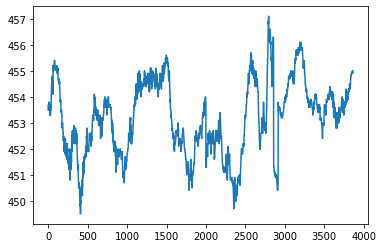

In [38]:
plt.plot(datum.H[datum.run == 5])

In [39]:
### year 2009 #
start = -1000
datum[start:start+20]
datum[datum.run == 5]
# 5148.0697 10424.3215
# 5148.0647 10424.3370 
# 5148.0659 10424.3377
# 5148.0648 10424.3376

,year,month,day,time,N,E,H,H-455,Gqi,Gsn,Ghdp,Ggs,compass,P0_code,T0_code,P_hpa0,"T0,C",P1_code,T1_code,P_hpa1,"T1,C","U15,V","U5,V","Uac,V","I,A","Tpow,C","Tmos,C","Bot,C","Top,C",Clin1,Clin2,ClinTh,run
0,2009,3,1,135532,5148.0659,10424.3377,453.5,-1.5,1,10,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3,24.4,NaN,NaN,NaN,5
1,2009,3,1,135533,5148.0659,10424.3377,453.7,-1.3,1,9,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3,24.4,NaN,NaN,NaN,5
2,2009,3,1,135534,5148.0659,10424.3377,453.5,-1.5,1,9,1.2,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3,24.4,NaN,NaN,NaN,5
3,2009,3,1,135535,5148.0659,10424.3377,453.6,-1.4,1,9,1.2,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3,24.4,NaN,NaN,NaN,5
4,2009,3,1,135536,5148.0659,10424.3377,453.6,-1.4,1,9,1.2,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.3,24.4,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3858,2009,3,1,160812,5148.0648,10424.3376,454.9,-0.1,2,8,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.3,23.1,NaN,NaN,NaN,5
3859,2009,3,1,160813,5148.0648,10424.3375,454.9,-0.1,2,8,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.2,23.1,NaN,NaN,NaN,5
3860,2009,3,1,160814,5148.0648,10424.3376,454.9,-0.1,2,8,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.2,23.0,NaN,NaN,NaN,5
3861,2009,3,1,160815,5148.0648,10424.3376,455.0,0.0,2,8,1.1,-35.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.3,23.2,NaN,NaN,NaN,5
